In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt

from torchvision import transforms, datasets

In [2]:
train = datasets.MNIST("", train = True, download = True, transform = transforms.Compose([transforms.ToTensor()])) 
test = datasets.MNIST("", train = False, download = True, transform = transforms.Compose([transforms.ToTensor()]))

C:\Users\Den\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True)
testset = torch.utils.data.DataLoader(test, batch_size = 10, shuffle = True)

In [4]:
for data in trainset:
    print(data)
    break
    
#whats happenning is because we had used the batch size as 10, iterating through will give 10 value at a time so we'll have 10 tensors of pixel values and 
#10 tensors of actual values

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [5]:
x, y = data[0][0], data[0][0]

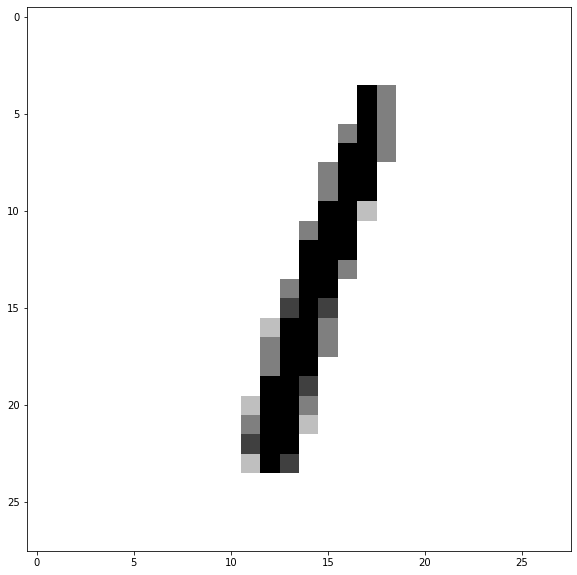

In [6]:
plt.figure(figsize = (10,10))
plt.imshow(data[0][0].view(28,28), cmap = plt.cm.binary)
plt.show()

In [7]:
#in the second row which is going to be the first iteration labels we will get 
print(data[1])

tensor([1, 6, 9, 5, 7, 1, 5, 5, 5, 2])


In [8]:
#counter list
counter_list = []

#we want to iterate through trainset which will get 10 examples at time of pixel values and testing values
for data in trainset:
    
    #this looks like it is doing the unpacking, xs will have the pixel value, and ys will have the label
    Xs, ys = data
    
    #now we want to (unpack / iterate) through that ys tensor which will have 10 labels
    for y in ys:
        
        #add to big list
        counter_list.append(int(y))

C:\Users\Den\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


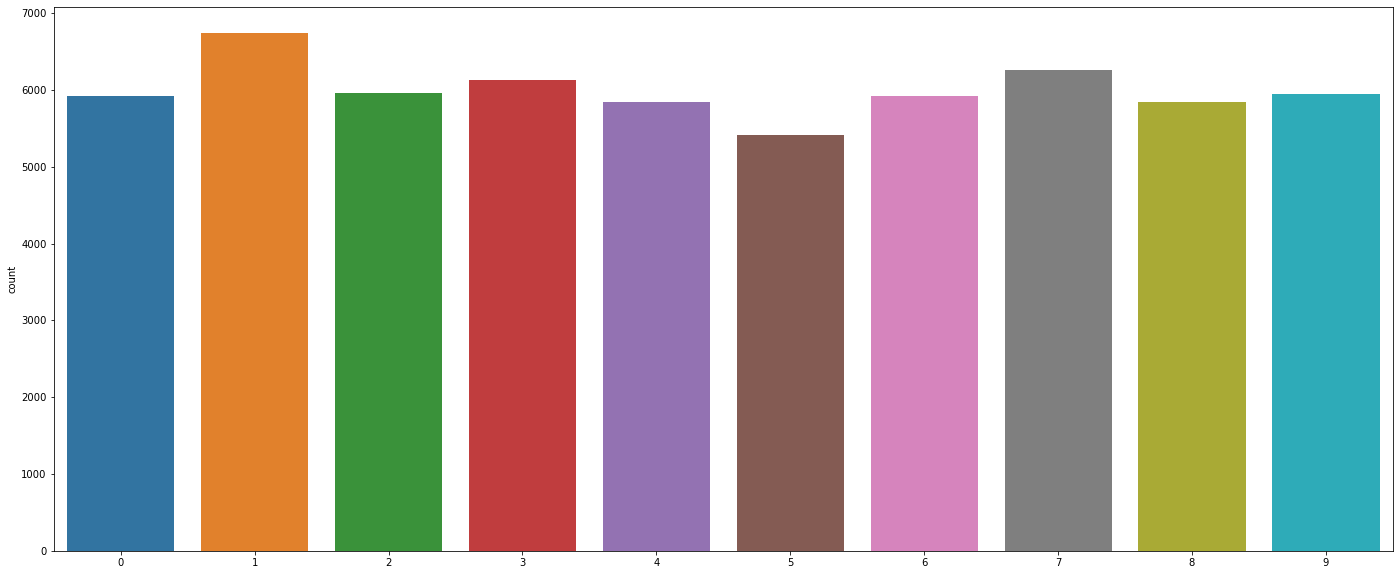

In [9]:
import seaborn as sns

plt.figure(figsize = (24,10))
sns.countplot(counter_list)
plt.show()

In [10]:
import torch.nn as nn
import torch.nn.functional as F

In [17]:
#to make the actual ML we need to make it a class
class Net(nn.Module):
    
    #initialize attributes
    def __init__(self):
        
        #we need to pass through the attributes from nn.module that we passed through when making this class
        super().__init__()
        
        #full connected linear layer, takes in 28 x 28 (784) when flattening, and outputingg 64 neurons to match next layer
        self.fc1 = nn.Linear(28 * 28, 64)
        
        #make new linear layers
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        
        #output layer
        self.fc4 = nn.Linear(64, 10)
    
    #the function that passes the data
    def forward(self, x):
        
        #we need to put activation functions on each layer
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        
        #we don't want the activation function because it is running on the output layers
        x = self.fc4(x)
        
        #we are going to use softmax as our output
        return F.log_softmax(x, dim = 1)

In [18]:
X = torch.rand((28,28))
X

tensor([[7.5447e-01, 6.8825e-01, 7.0879e-01, 1.7804e-02, 9.5331e-01, 4.9383e-01,
         2.2500e-01, 3.2471e-01, 5.5871e-01, 8.1578e-01, 8.6815e-01, 7.5629e-01,
         5.9261e-01, 9.7264e-01, 6.8113e-01, 9.8947e-01, 2.7311e-01, 9.3837e-01,
         6.9543e-01, 9.8585e-01, 6.0777e-01, 3.7062e-01, 7.8384e-01, 1.2914e-01,
         1.5135e-02, 2.8358e-01, 2.3829e-01, 8.4502e-01],
        [6.4468e-01, 1.0820e-01, 4.0585e-02, 9.0826e-02, 9.1039e-01, 6.1610e-01,
         6.7464e-01, 6.4626e-01, 2.2661e-01, 7.4910e-01, 5.8431e-01, 5.7224e-01,
         3.7059e-01, 4.6998e-01, 6.9651e-01, 6.2874e-01, 4.0331e-01, 3.0938e-01,
         6.2912e-01, 4.4980e-01, 9.9551e-01, 1.4360e-01, 3.2224e-01, 9.2295e-02,
         8.1249e-01, 6.4598e-01, 3.4324e-01, 3.2421e-02],
        [8.5991e-01, 8.7428e-02, 3.7333e-01, 5.7702e-01, 5.2632e-01, 3.7907e-01,
         7.3687e-01, 6.5380e-01, 5.9523e-01, 6.7426e-01, 9.4786e-01, 4.9094e-01,
         3.1523e-01, 7.8312e-01, 9.7797e-01, 2.8396e-01, 3.8855e-01, 5.534

In [20]:
#need to instantanteniate the class
net = Net()

In [21]:
#then reshape the data so that it can be read and it has to be done in this specific way
X = X.view(-1, 28 * 28)

#then pass it through the neural network
output = net(X)

In [22]:
#the output comes out as tensor
output

tensor([[-2.3278, -2.2701, -2.3080, -2.3333, -2.1929, -2.3984, -2.3019, -2.3419,
         -2.3178, -2.2481]], grad_fn=<LogSoftmaxBackward>)

In [23]:
import torch.optim as optim

#makes the optimizer
optimizer = optim.Adam(net.parameters(), lr = 0.0001)



SyntaxError: invalid syntax (<ipython-input-23-d2a8939472e8>, line 6)